In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [88]:
shop_info = pd.read_csv('../mall.csv')

In [89]:
all_id_list = list(shop_info['mall_id'].unique())

In [28]:
knn_train = pd.read_csv('../data/train1.csv')

In [29]:
knn_test = pd.read_csv('../data/test1.csv')

In [42]:
for mall_id in ['m_3739']:
    # 1409
    print(mall_id)
    tmp_train = knn_train[knn_train['mall_id']==mall_id]
    tmp_train = tmp_train.sort_values(['strength'],ascending=False)
    tmp_train = tmp_train.groupby(['index'],as_index=False).head(2)
    del tmp_train["Unnamed: 0"]
    tmp_test = knn_test[knn_test['mall_id']==mall_id]
    tmp_test = tmp_test.sort_values(['strength'], ascending=False)
    tmp_test = tmp_test.groupby(['index'],as_index=False).head(2)
    del tmp_test["Unnamed: 0"]
    all_tmp = pd.concat([tmp_train,tmp_test],axis=0,keys=['train','test'])
    one_hot_bassid = pd.get_dummies(all_tmp['bssid'],prefix='bssid')
    one_hot_connect = pd.get_dummies(all_tmp['connect'],prefix='connect')
    one_hot_time_stamp = pd.get_dummies(all_tmp['time_stamp'],prefix='time_stamp')
    one_hot_situation = pd.get_dummies(all_tmp['situation'],prefix='situation')
    all_tmp = pd.concat([all_tmp[['shop_id','index']],one_hot_bassid,one_hot_connect,one_hot_situation],axis=1)
    Train_ = all_tmp[:tmp_train.shape[0]]
    Test_ = all_tmp[tmp_train.shape[0]:]
    del Test_['shop_id']
    del Test_['index']
    Train_ = Train_.groupby(['index','shop_id'],as_index=False).sum()
    X_train_label = Train_.pop('shop_id')
    del Train_['index']
    kfold = StratifiedKFold(n_splits=10)

m_3739


In [1]:
Train_.head()

NameError: name 'Train_' is not defined

In [34]:
Train_ = all_tmp[:tmp_train.shape[0]]

In [35]:
# del Train_['index']
Test_ = all_tmp[tmp_train.shape[0]:]
del Test_['shop_id']
del Test_['index']

In [7]:
Train_.head()

shop_id  index  bssid_b_10605213  bssid_b_10775777  \
train 213207   s_417391  21742                 0                 0   
      292652  s_3099560  29870                 0                 0   
      368691   s_869642  37690                 0                 0   
      795256  s_3259736  81524                 0                 0   
      520298   s_869642  53260                 0                 0   

              bssid_b_1109051  bssid_b_1109052  bssid_b_1109053  \
train 213207                0                0                0   
      292652                0                0                0   
      368691                0                0                0   
      795256                0                0                0   
      520298                0                0                0   

              bssid_b_11238495  bssid_b_11647294  bssid_b_11822084  \
train 213207                 0                 0                 0   
      292652                 0                 0                 0   
      368691                 0                 0                 0   
      795256                 0                 0                 0   
      520298                 0                 0                 0   

                  ...       bssid_b_8977772  bssid_b_8977775  bssid_b_9008220  \
train 213207      ...                     0                0                0   
      292652      ...                     0                0                0   
      368691      ...                     0                0                0   
      795256      ...                     0                0                0   
      520298      ...                     0                0                0   

              bssid_b_938453  connect_False  connect_True  time_stamp_a  \
train 213207               0              1             0             0   
      292652               0              1             0             0   
      368691               0              1             0             0   
      795256               0              1             0             0   
      520298               0              1             0             0   

              time_stamp_b  time_stamp_c  time_stamp_d  
train 213207             0             0             1  
      292652             1             0             0  
      368691             1             0             0  
      795256             0             0             1  
      520298             0             0             1  

[5 rows x 614 columns]

In [8]:
Train_ = Train_.groupby(['index','shop_id'],as_index=False).sum()

In [ ]:
Train_.head()

In [9]:
X_train_label = Train_.pop('shop_id')

In [10]:
del Train_['index']

In [113]:
from sklearn.preprocessing import LabelEncoder

In [11]:
kfold = StratifiedKFold(n_splits=10)

In [14]:
le = LabelEncoder()
X_train_label = le.fit_transform(X_train_label)

In [15]:
X_train_label

array([22, 22, 59, ..., 69, 76, 74], dtype=int64)

c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\mode

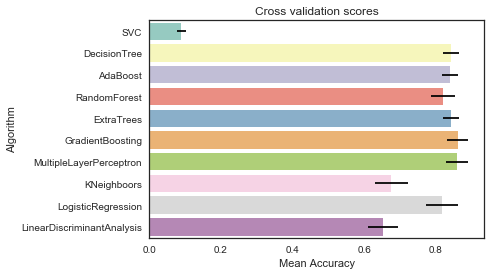

In [103]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for i in classifiers:
    cv_results.append(cross_val_score(i,Train_,y = X_train_label,scoring = "accuracy",cv = kfold,n_jobs=3))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [20]:
cv_means1

[0.089609316747967932,
 0.79967201859112991,
 0.8027648136988299,
 0.77164374664940438,
 0.78871363541449224,
 0.86949124106609277,
 0.8823934045862154,
 0.6556207600245797,
 0.83338822199260554,
 0.64919841881703966]

In [58]:
cv_means2

[0.089609316747967932,
 0.82003058970506115,
 0.82704604767104473,
 0.80231420249281782,
 0.82332815320332497,
 0.86143143159243674,
 0.88171814703261864,
 0.68004739882291321,
 0.83304703866637408,
 0.67319919433807462]

In [86]:
cv_means3

[0.089609316747967932,
 0.84625155239667793,
 0.84576278227774926,
 0.83165788959528208,
 0.83840751199983488,
 0.85931975963932872,
 0.87450597094912852,
 0.70234287620771796,
 0.82072487730357313,
 0.66825105090153281]

In [104]:
cv_means

[0.089609316747967932,
 0.84256506098811779,
 0.83918155536458716,
 0.820429905890524,
 0.84190100780821964,
 0.86091197010247278,
 0.85852848011142646,
 0.67637106849846873,
 0.8168001979073336,
 0.65321700937804461]

In [116]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini"],
              "base_estimator__splitter" :   ["random"],
              "algorithm" : ["SAMME.R"],
              "n_estimators" :[4,5,6],
              "learning_rate":  [1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(Train_,X_train_label)

ada_best = gsadaDTC.best_estimator_
print(ada_best)
print(gsadaDTC.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   21.9s finished


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=1.5, n_estimators=5, random_state=7)
0.839108910891


In [18]:
ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(Train_,X_train_label)

ExtC_best = gsExtC.best_estimator_

print(ExtC_best)
print(gsExtC.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   36.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  3.4min finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=1, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.87004950495


In [23]:
GBC = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],"n_estimators":[200],"max_depth":[4] }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(Train_,X_train_label)

GBC_best = gsGBC.best_estimator_

print(GBC_best)
print(gsGBC.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 21.8min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.858910891089


In [118]:
DT = DecisionTreeClassifier()

dt_param_grid = {}

gsDT = GridSearchCV(DT,param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsDT.fit(Train_,X_train_label)

DT_best = gsDT.best_estimator_

print(DT_best)
print(gsDT.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.8s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.839727722772


In [18]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [1],
              "min_samples_split": [4],
              "min_samples_leaf": [1],
              "bootstrap": [False],
              "n_estimators" :[500,800,1200],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(Train_,X_train_label)

RFC_best = gsRFC.best_estimator_

print(RFC_best)
print(gsRFC.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.858910891089


In [41]:
MLP = MLPClassifier()

mlp_param_grid = {}

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsMLP.fit(Train_,X_train_label)

MLP_best = gsMLP.best_estimator_

print(MLP_best)
print(gsMLP.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.6min finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
0.870668316832


In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",Train_,X_train_label,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",Train_,X_train_label,cv=kfold)
g = plot_learning_curve(gsDT.best_estimator_,"DT learning curves",Train_,X_train_label,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",Train_,X_train_label,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",Train_,X_train_label,cv=kfold)
g = plot_learning_curve(gsMLP.best_estimator_,"MLP learning curves",Train_,X_train_label,cv=kfold)

c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\mode

KeyboardInterrupt: 

In [12]:
ada_best = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.0001, n_estimators=2, random_state=7)

ExtC_best = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=1, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

DT_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

RFC_best = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

GBC_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

MLP_best = MLPClassifier()

In [15]:
# votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
# ('dt', DT_best), ('adac',ada_best),('gbc',GBC_best),('mlp',MLP_best)], voting='soft', n_jobs=4)
#votingC = votingC.fit(X_train, Y_train)
score = cross_val_score(MLP_best,Train_,y = X_train_label,scoring = "accuracy",cv = kfold,n_jobs=4)
print(score)

c:\users\roy\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[ 0.73913043  0.76404494  0.76047904  0.76666667  0.82269504  0.85820896
  0.79230769  0.87603306  0.82051282  0.82142857]


In [16]:
score.mean()

0.80215072199708648

In [38]:
score.mean()

0.86743873575145936